In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [54]:
df=pd.read_excel('DryBeanDataset/Dry_Bean_Dataset.xlsx')

In [55]:
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [57]:
df.describe(percentiles=[.95])#to get 95%

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
95%,89824.500000,1181.124000,448.323944,267.885177,2.082011,0.877102,91282.000000,338.183538,0.812253,0.992027,0.959254,0.908990,0.008305,0.002724,0.826262,0.998992
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [58]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [59]:
df.head()


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


## Cleaning Data

In [60]:
df.drop_duplicates(inplace=True)

In [61]:
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [62]:

# df['Class'].value_counts().plot(kind='bar',color='pink')

<AxesSubplot:>

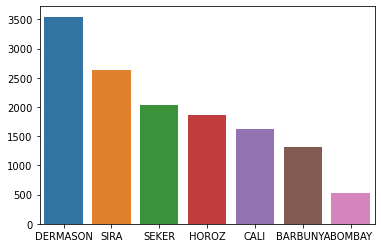

In [63]:
counts = df['Class'].value_counts()
sns.barplot(x=counts.index,y=counts.values,)

In [64]:
# counts

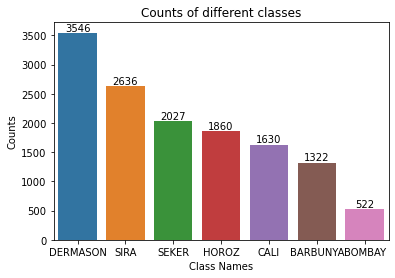

In [65]:
ax=sns.barplot(x=counts.index,y=counts.values,palette="tab10")
# ax.color_palette("tab10")
ax.set_title('Counts of different classes')
ax.set_xlabel('Class Names')
ax.set_ylabel('Counts')
for i in ax.containers:
    ax.bar_label(i,)

In [66]:
Col_name=df.drop(columns=['Class']).columns
Col_name

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4'],
      dtype='object')

Area AxesSubplot(0.125,0.71587;0.168478x0.16413)
Perimeter AxesSubplot(0.327174,0.71587;0.168478x0.16413)
MajorAxisLength AxesSubplot(0.529348,0.71587;0.168478x0.16413)
MinorAxisLength AxesSubplot(0.731522,0.71587;0.168478x0.16413)
AspectRation AxesSubplot(0.125,0.518913;0.168478x0.16413)
Eccentricity AxesSubplot(0.327174,0.518913;0.168478x0.16413)
ConvexArea AxesSubplot(0.529348,0.518913;0.168478x0.16413)
EquivDiameter AxesSubplot(0.731522,0.518913;0.168478x0.16413)
Extent AxesSubplot(0.125,0.321957;0.168478x0.16413)
Solidity AxesSubplot(0.327174,0.321957;0.168478x0.16413)
roundness AxesSubplot(0.529348,0.321957;0.168478x0.16413)
Compactness AxesSubplot(0.731522,0.321957;0.168478x0.16413)
ShapeFactor1 AxesSubplot(0.125,0.125;0.168478x0.16413)
ShapeFactor2 AxesSubplot(0.327174,0.125;0.168478x0.16413)
ShapeFactor3 AxesSubplot(0.529348,0.125;0.168478x0.16413)
ShapeFactor4 AxesSubplot(0.731522,0.125;0.168478x0.16413)


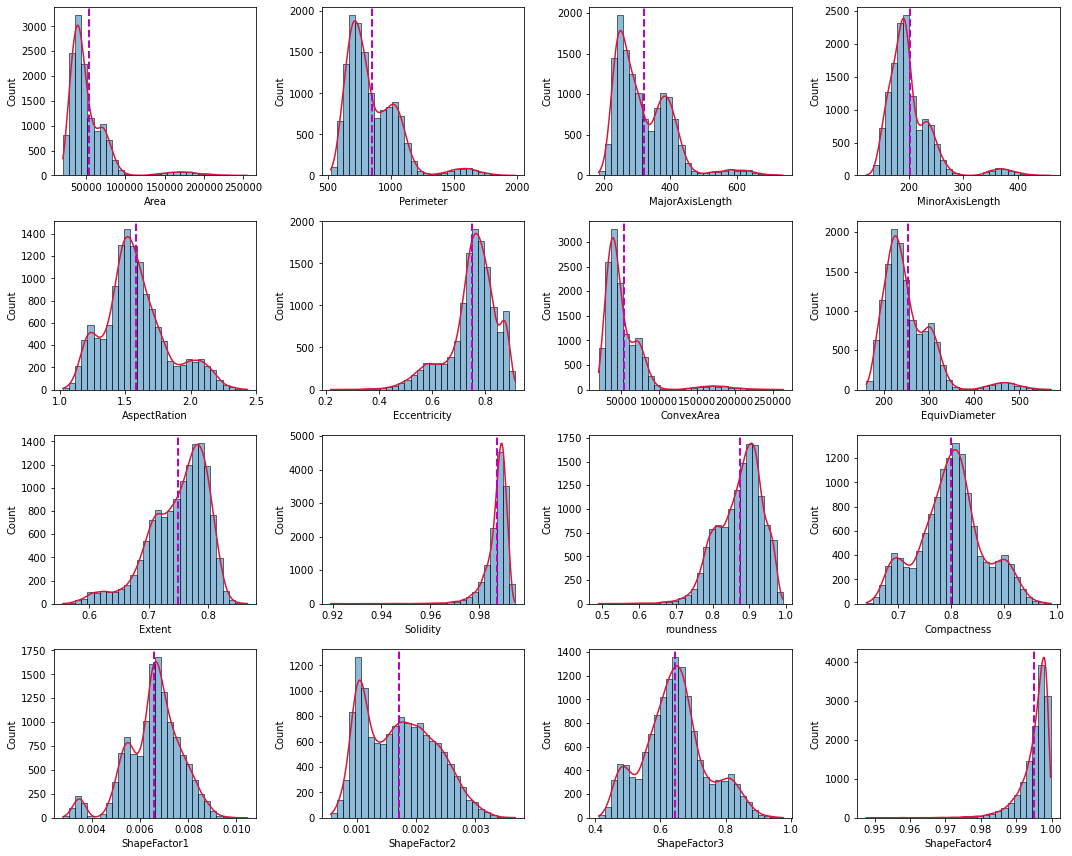

In [67]:
fig,ax=plt.subplots(4,4,figsize=(15,12))
for variable,subplot in zip(Col_name,ax.flatten()):
    print(variable,subplot)
    g=sns.histplot(df[variable],bins=30,kde=True,ax=subplot)
    g.lines[0].set_color('crimson')
    g.axvline(x=df[variable].mean(),color='m',label='Mean',linestyle='--',linewidth=2)
plt.tight_layout()
    

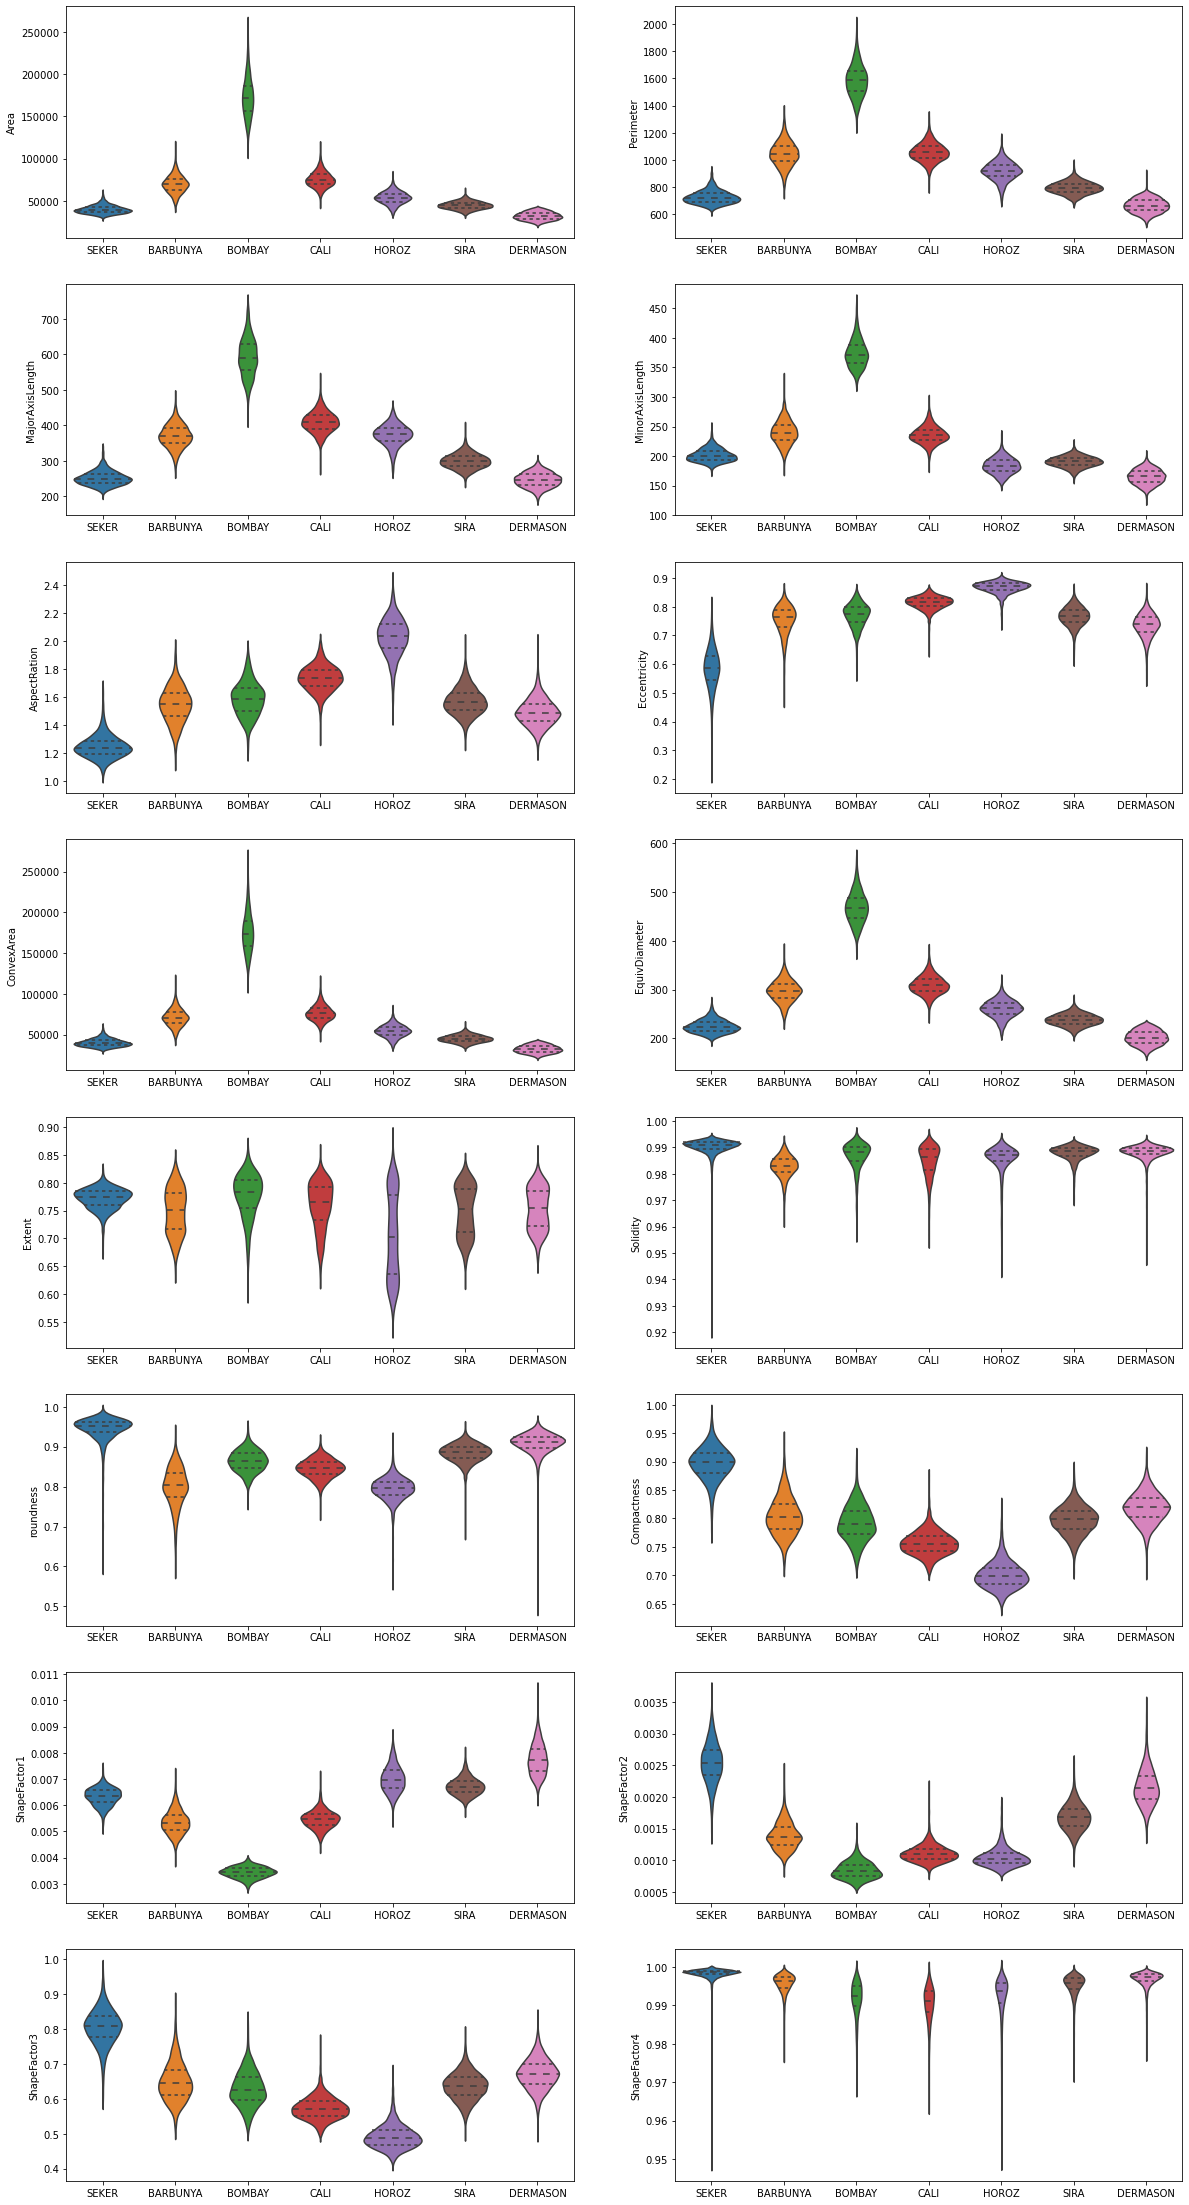

In [68]:
fig,ax=plt.subplots(8,2,figsize=(20,40))
for features, subplot in zip(Col_name,ax.flatten()):
    sns.violinplot(data=df,x='Class',y=features,inner='quartile',ax=subplot)
    subplot.set(xlabel=None)
plt.show()


<AxesSubplot:>

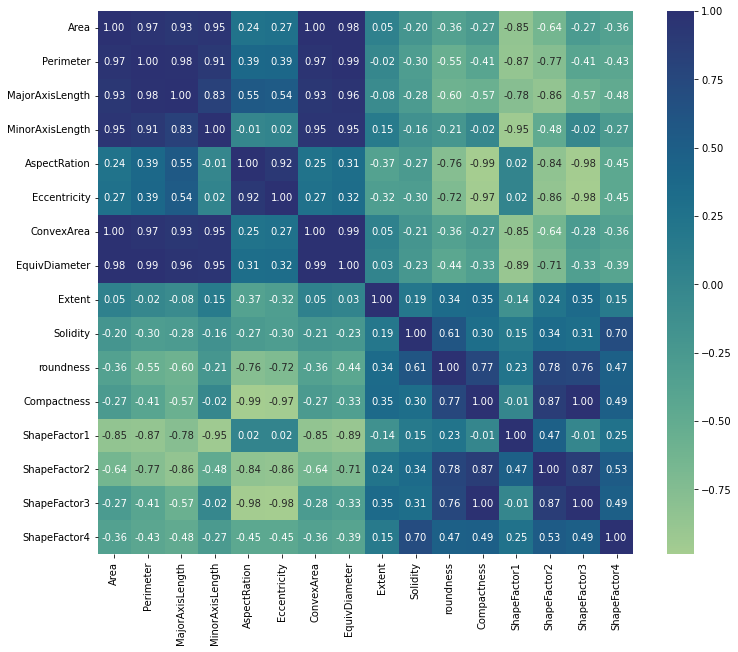

In [69]:
corr_matrix=df.corr()
plt.figure(figsize=[12,10])
sns.heatmap((corr_matrix),annot=True,cmap='crest',fmt='.2f')


In [70]:
# sns.pairplot(df,hue='Class')

## Classification models

In [71]:
from sklearn.metrics import classification_report,f1_score,precision_score,recall_score,confusion_matrix

In [72]:
def gen_report(y_test,y_pred):
    
    report = classification_report(y_test,y_pred)
    cm = confusion_matrix(y_test,y_pred)
    f1 = f1_score(y_test,y_pred,average='weighted')
    precision = precision_score(y_test,y_pred,average='weighted')
    recall = recall_score(y_test,y_pred,average='weighted')
    
    print('Report : \n',report)
    print(f'Conufusion Matrix : \n {cm}')
    print(f'f1 score : \n {f1}')
    print(f'precision : \n {precision}')
    print(f'recall : \n {recall}')
    
    
    return report, cm, f1, precision, recall

In [73]:
df_train=df.drop(columns=['Class'])
df_test=pd.DataFrame()
df_test['Class']=df['Class']

In [74]:
from sklearn import preprocessing,tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [75]:
df_train

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222


In [76]:
df_test

,Class
0,SEKER
1,SEKER
2,SEKER
3,SEKER
4,SEKER
...,...
13606,DERMASON
13607,DERMASON
13608,DERMASON
13609,DERMASON


In [77]:
Label_Encoder=preprocessing.LabelEncoder()

df_test['Class']=Label_Encoder.fit_transform(df_test['Class'])

df_test['Class'].unique()

array([5, 0, 1, 2, 4, 6, 3])

### Naive Bayes Classifier

In [78]:
from sklearn.naive_bayes import GaussianNB

In [79]:
# X_train, X_test, y_train, y_test = train_test_split(df_train,df_test,random_state=42)

scaling=StandardScaler()

# Use fit and transform method for train data
scaling.fit(df_train)
df_train_scaled=scaling.transform(df_train)



X_train, X_test, y_train, y_test = train_test_split(df_train_scaled,df_test,random_state=42)

gnb = GaussianNB()

In [80]:
y_pred = gnb.fit(X_train, y_train).predict(X_test)

C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [81]:
y_pred

array([5, 0, 3, ..., 3, 3, 3])

In [82]:
accuracy_score(y_test,y_pred)

0.8922031896042528

In [83]:
report, cm, f1, precision,recall = gen_report(y_test,y_pred)

Report : 
               precision    recall  f1-score   support

           0       0.86      0.80      0.83       341
           1       0.99      1.00      1.00       141
           2       0.85      0.90      0.87       384
           3       0.93      0.86      0.89       871
           4       0.94      0.95      0.95       465
           5       0.93      0.95      0.94       511
           6       0.81      0.87      0.84       673

    accuracy                           0.89      3386
   macro avg       0.90      0.90      0.90      3386
weighted avg       0.89      0.89      0.89      3386

Conufusion Matrix : 
 [[273   0  52   0   1   2  13]
 [  0 141   0   0   0   0   0]
 [ 31   1 345   0   5   1   1]
 [  0   0   0 748   1  23  99]
 [  1   0   8   6 442   0   8]
 [  6   0   0   5   0 485  15]
 [  7   0   1  46  19  13 587]]
f1 score : 
 0.8923038178781221
precision : 
 0.8939527264805066
recall : 
 0.8922031896042528


In [84]:
# print("Number of mislabeled points out of a total %d points : %d",(X_test.shape[0], (y_test_array != y_pred).sum()))

In [85]:
X_test.shape[0]
# (y_test != y_pred).sum()
y_test_array = y_test.to_numpy()

In [86]:
(y_test_array!=y_pred).sum()
# y_pred

9507514

In [87]:
y_test_array

array([[5],
       [2],
       [3],
       ...,
       [3],
       [3],
       [3]])

### Decision Tree Classifier

In [88]:
from sklearn import tree




In [89]:
X_train, X_test, y_train, y_test = train_test_split(df_train_scaled,df_test,random_state=42)

In [90]:
# y_test
dst_clf = tree.DecisionTreeClassifier()
dst_clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [91]:
# tree.plot_tree(dst_clf)

In [92]:
import graphviz
dot_data = tree.export_graphviz(dst_clf,out_file=None)
graph = graphviz.Source(dot_data)
graph.render('bean.pdf')

'bean.pdf.pdf'

In [93]:
dot_data = tree.export_graphviz(dst_clf,out_file=None,feature_names=df_train.columns,class_names=df['Class'].unique(),filled=True,rounded=True,special_characters=True)
graph = graphviz.Source(dot_data)
graph.render('bean')

'bean.pdf'

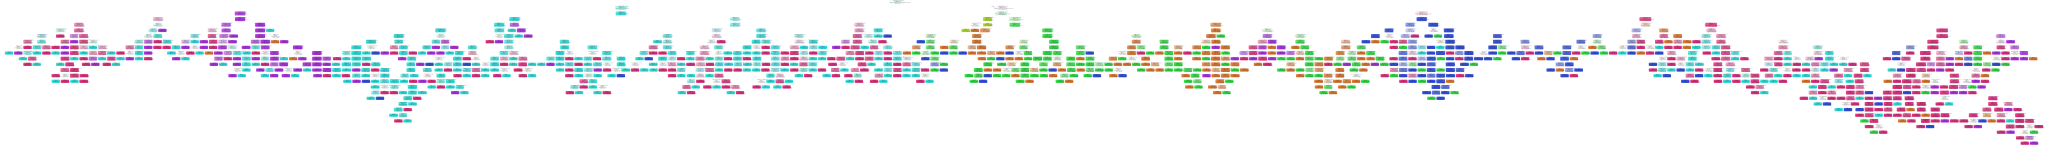

In [94]:
graph 

In [95]:
y_pred = dst_clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.8886591848789132

In [96]:
report, cm, f1, precision,recall = gen_report(y_test,y_pred)

Report : 
               precision    recall  f1-score   support

           0       0.89      0.87      0.88       341
           1       1.00      1.00      1.00       141
           2       0.89      0.91      0.90       384
           3       0.89      0.89      0.89       871
           4       0.92      0.93      0.92       465
           5       0.90      0.91      0.90       511
           6       0.84      0.82      0.83       673

    accuracy                           0.89      3386
   macro avg       0.90      0.90      0.90      3386
weighted avg       0.89      0.89      0.89      3386

Conufusion Matrix : 
 [[295   0  30   0   4   6   6]
 [  0 141   0   0   0   0   0]
 [ 22   0 348   0   9   1   4]
 [  1   0   0 779   7  19  65]
 [  3   0   9   5 431   0  17]
 [  6   0   1  24   0 465  15]
 [  6   0   2  67  20  28 550]]
f1 score : 
 0.8884410008818769
precision : 
 0.8883367508246793
recall : 
 0.8886591848789132


In [97]:
# sns.heatmap()

In [98]:
len(y_test)

3386

### PCA

In [99]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [100]:
# Scale data before applying PCA
scaling=StandardScaler()

# Use fit and transform method for train data
scaling.fit(df_train)
Scaled_data=scaling.transform(df_train)

# Set the n_components=3
principal=PCA(n_components=2)
principal.fit(Scaled_data)
x=principal.transform(Scaled_data)

# Check the dimensions of data after PCA
print(x.shape)

(13543, 2)


In [101]:
principal.n_features_

16

In [102]:
principal.components_

array([[ 0.28251975,  0.31072846,  0.32554676,  0.23681945,  0.22924686,
         0.23122765,  0.28325845,  0.29745477, -0.05965166, -0.14314798,
        -0.24786185, -0.23824238, -0.22194727, -0.31449045, -0.23881184,
        -0.19847095],
       [ 0.24554831,  0.17932251,  0.1012622 ,  0.34276635, -0.33106536,
        -0.3199065 ,  0.24429307,  0.22257357,  0.22181401,  0.10405185,
         0.21423127,  0.32921806, -0.33187969,  0.12894216,  0.32785851,
         0.10037378]])

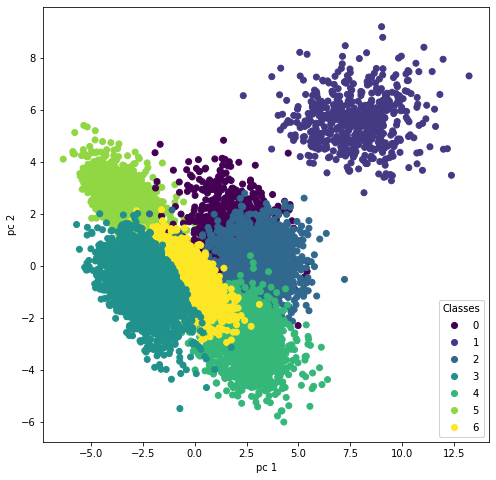

In [103]:

fig, ax = plt.subplots(figsize=(8,8))

# plt.figure(figsize=(10,10))
scatter = ax.scatter(x[:,0],x[:,1],c=df_test['Class'],cmap='viridis')
# plt.figure(figsize=(10,10))
# plt.legend(df_test['Class'])
plt.xlabel('pc 1')
plt.ylabel('pc 2')

legend1 = ax.legend(*scatter.legend_elements(),loc="lower right", title="Classes")

ax.add_artist(legend1)


IndexError: index 2 is out of bounds for axis 1 with size 2

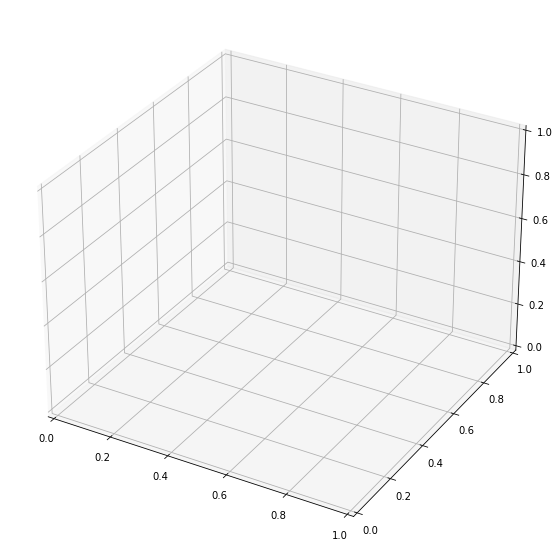

In [104]:
# import relevant libraries for 3d graph
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))

# choose projection 3d for creating a 3d graph
axis = fig.add_subplot(111, projection='3d')

# x[:,0]is pc1,x[:,1] is pc2 while x[:,2] is pc3
axis.scatter(x[:,0],x[:,1],x[:,2], c=df_test['Class'],cmap='plasma')
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)

### Random Forest

In [105]:
from sklearn.ensemble import RandomForestClassifier

In [106]:
RF = RandomForestClassifier()

In [107]:
RF.fit(X_train,y_train)

C:\Users\harsh\AppData\Local\Temp\ipykernel_27396\3662798500.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(X_train,y_train)


RandomForestClassifier()

In [108]:
y_pred = RF.predict(X_test)



In [109]:
report, cm, f1, precision,recall = gen_report(y_test,y_pred)

Report : 
               precision    recall  f1-score   support

           0       0.93      0.90      0.91       341
           1       1.00      1.00      1.00       141
           2       0.93      0.93      0.93       384
           3       0.90      0.93      0.92       871
           4       0.95      0.94      0.95       465
           5       0.94      0.93      0.94       511
           6       0.88      0.86      0.87       673

    accuracy                           0.92      3386
   macro avg       0.93      0.93      0.93      3386
weighted avg       0.92      0.92      0.92      3386

Conufusion Matrix : 
 [[307   0  22   0   1   2   9]
 [  0 141   0   0   0   0   0]
 [ 15   0 359   0   7   1   2]
 [  0   0   0 811   1  15  44]
 [  4   0   6   6 439   0  10]
 [  3   0   0  19   0 477  12]
 [  2   0   1  61  16  14 579]]
f1 score : 
 0.919254590654291
precision : 
 0.9193418795889946
recall : 
 0.9193738924985233


In [110]:
accuracy_score(y_test,y_pred)

0.9193738924985233

In [111]:
df_train.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4'],
      dtype='object')

In [112]:
df = df[['Perimeter','MajorAxisLength', 'MinorAxisLength','Extent','Eccentricity',
'Solidity', 'roundness', 'Compactness','ShapeFactor4','Class']]

In [113]:
df

,Perimeter,MajorAxisLength,MinorAxisLength,Extent,Eccentricity,Solidity,roundness,Compactness,ShapeFactor4,Class
0,610.291,208.178117,173.888747,0.763923,0.549812,0.988856,0.958027,0.913358,0.998724,SEKER
1,638.018,200.524796,182.734419,0.783968,0.411785,0.984986,0.887034,0.953861,0.998430,SEKER
2,624.110,212.826130,175.931143,0.778113,0.562727,0.989559,0.947849,0.908774,0.999066,SEKER
3,645.884,210.557999,182.516516,0.782681,0.498616,0.976696,0.903936,0.928329,0.994199,SEKER
4,620.134,201.847882,190.279279,0.773098,0.333680,0.990893,0.984877,0.970516,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...
13606,759.696,288.721612,185.944705,0.714574,0.765002,0.990331,0.916603,0.801865,0.998385,DERMASON
13607,757.499,281.576392,190.713136,0.799943,0.735702,0.990752,0.922015,0.822252,0.998219,DERMASON
13608,759.321,281.539928,191.187979,0.729932,0.734065,0.989899,0.918424,0.822730,0.996767,DERMASON
13609,763.779,283.382636,190.275731,0.705389,0.741055,0.987813,0.907906,0.817457,0.995222,DERMASON


##### SMOTE and ADASYN

In [114]:
from imblearn.over_sampling import SMOTEN

In [115]:
X, y = df.drop(columns = ['Class']), df['Class']

In [116]:
X


,Perimeter,MajorAxisLength,MinorAxisLength,Extent,Eccentricity,Solidity,roundness,Compactness,ShapeFactor4
0,610.291,208.178117,173.888747,0.763923,0.549812,0.988856,0.958027,0.913358,0.998724
1,638.018,200.524796,182.734419,0.783968,0.411785,0.984986,0.887034,0.953861,0.998430
2,624.110,212.826130,175.931143,0.778113,0.562727,0.989559,0.947849,0.908774,0.999066
3,645.884,210.557999,182.516516,0.782681,0.498616,0.976696,0.903936,0.928329,0.994199
4,620.134,201.847882,190.279279,0.773098,0.333680,0.990893,0.984877,0.970516,0.999166
...,...,...,...,...,...,...,...,...,...
13606,759.696,288.721612,185.944705,0.714574,0.765002,0.990331,0.916603,0.801865,0.998385
13607,757.499,281.576392,190.713136,0.799943,0.735702,0.990752,0.922015,0.822252,0.998219
13608,759.321,281.539928,191.187979,0.729932,0.734065,0.989899,0.918424,0.822730,0.996767
13609,763.779,283.382636,190.275731,0.705389,0.741055,0.987813,0.907906,0.817457,0.995222


In [117]:
y


0           SEKER
1           SEKER
2           SEKER
3           SEKER
4           SEKER
           ...   
13606    DERMASON
13607    DERMASON
13608    DERMASON
13609    DERMASON
13610    DERMASON
Name: Class, Length: 13543, dtype: object

In [118]:
sampler=SMOTEN(random_state=0)
X_res, y_res=sampler.fit_resample(X,y)

#oversample all the values of the original df



In [119]:
X_res

,Perimeter,MajorAxisLength,MinorAxisLength,Extent,Eccentricity,Solidity,roundness,Compactness,ShapeFactor4
0,610.291,208.178117,173.888747,0.763923,0.549812,0.988856,0.958027,0.913358,0.998724
1,638.018,200.524796,182.734419,0.783968,0.411785,0.984986,0.887034,0.953861,0.998430
2,624.110,212.826130,175.931143,0.778113,0.562727,0.989559,0.947849,0.908774,0.999066
3,645.884,210.557999,182.516516,0.782681,0.498616,0.976696,0.903936,0.928329,0.994199
4,620.134,201.847882,190.279279,0.773098,0.333680,0.990893,0.984877,0.970516,0.999166
...,...,...,...,...,...,...,...,...,...
24817,801.999,299.431987,186.820417,0.648913,0.747578,0.984005,0.855489,0.761486,0.992364
24818,801.999,299.431987,186.820417,0.648913,0.747578,0.984005,0.855489,0.761486,0.992364
24819,801.999,299.431987,186.820417,0.648913,0.747578,0.984005,0.855489,0.761486,0.992364
24820,801.999,299.431987,186.820417,0.648913,0.747578,0.984005,0.855489,0.761486,0.992364


In [120]:
y_res

0        SEKER
1        SEKER
2        SEKER
3        SEKER
4        SEKER
         ...  
24817     SIRA
24818     SIRA
24819     SIRA
24820     SIRA
24821     SIRA
Name: Class, Length: 24822, dtype: object

In [121]:
df_res=pd.concat([X_res,y_res],axis=1) #concate the class variable to the resambled df


In [122]:
df_res

,Perimeter,MajorAxisLength,MinorAxisLength,Extent,Eccentricity,Solidity,roundness,Compactness,ShapeFactor4,Class
0,610.291,208.178117,173.888747,0.763923,0.549812,0.988856,0.958027,0.913358,0.998724,SEKER
1,638.018,200.524796,182.734419,0.783968,0.411785,0.984986,0.887034,0.953861,0.998430,SEKER
2,624.110,212.826130,175.931143,0.778113,0.562727,0.989559,0.947849,0.908774,0.999066,SEKER
3,645.884,210.557999,182.516516,0.782681,0.498616,0.976696,0.903936,0.928329,0.994199,SEKER
4,620.134,201.847882,190.279279,0.773098,0.333680,0.990893,0.984877,0.970516,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...
24817,801.999,299.431987,186.820417,0.648913,0.747578,0.984005,0.855489,0.761486,0.992364,SIRA
24818,801.999,299.431987,186.820417,0.648913,0.747578,0.984005,0.855489,0.761486,0.992364,SIRA
24819,801.999,299.431987,186.820417,0.648913,0.747578,0.984005,0.855489,0.761486,0.992364,SIRA
24820,801.999,299.431987,186.820417,0.648913,0.747578,0.984005,0.855489,0.761486,0.992364,SIRA


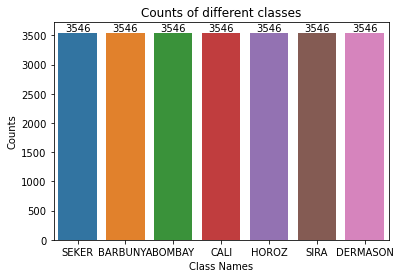

In [123]:
counts = df_res['Class'].value_counts()
# sns.barplot(x=counts.index,y=counts.values,)
ax=sns.barplot(x=counts.index,y=counts.values,palette="tab10")
# ax.color_palette("tab10")
ax.set_title('Counts of different classes')
ax.set_xlabel('Class Names')
ax.set_ylabel('Counts')
for i in ax.containers:
    ax.bar_label(i,)

In [124]:
df_train=df_res.drop(columns=['Class'])
df_test=pd.DataFrame()
df_test['Class']=df_res['Class']

### Naive Bayes Classifier after SMOTE

In [125]:
Label_Encoder=preprocessing.LabelEncoder()

df_test['Class']=Label_Encoder.fit_transform(df_test['Class'])

df_test['Class'].unique()

array([5, 0, 1, 2, 4, 6, 3])

In [126]:
scaling=StandardScaler()

# Use fit and transform method for train data
scaling.fit(df_train)
df_train_scaled=scaling.transform(df_train)



X_train, X_test, y_train, y_test = train_test_split(df_train_scaled,df_test,random_state=42)

gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test,y_pred))
report, cm, f1, precision,recall = gen_report(y_test,y_pred)

0.9394134708346761
Report : 
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       897
           1       1.00      1.00      1.00       917
           2       0.92      0.94      0.93       895
           3       0.91      0.90      0.91       876
           4       0.98      0.95      0.96       889
           5       0.95      0.97      0.96       857
           6       0.87      0.89      0.88       875

    accuracy                           0.94      6206
   macro avg       0.94      0.94      0.94      6206
weighted avg       0.94      0.94      0.94      6206

Conufusion Matrix : 
 [[827   0  52   0   1   0  17]
 [  1 916   0   0   0   0   0]
 [ 41   0 841   0   6   0   7]
 [  2   0   0 792   0  25  57]
 [  4   0  21   6 842   0  16]
 [  1   0   0   6   0 835  15]
 [  0   0   1  62  14  21 777]]
f1 score : 
 0.9394693751837595
precision : 
 0.9397313164053573
recall : 
 0.9394134708346761


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Decision Tree Classifier after SMOTE

In [127]:
X_train, X_test, y_train, y_test = train_test_split(df_train_scaled,df_test,random_state=42)
dst_clf = tree.DecisionTreeClassifier()
dst_clf.fit(X_train,y_train)
y_pred = dst_clf.predict(X_test)
print(accuracy_score(y_test,y_pred))
report, cm, f1, precision,recall = gen_report(y_test,y_pred) #called the report function

0.9421527553980019
Report : 
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       897
           1       1.00      1.00      1.00       917
           2       0.95      0.96      0.95       895
           3       0.89      0.89      0.89       876
           4       0.96      0.95      0.96       889
           5       0.96      0.95      0.96       857
           6       0.88      0.88      0.88       875

    accuracy                           0.94      6206
   macro avg       0.94      0.94      0.94      6206
weighted avg       0.94      0.94      0.94      6206

Conufusion Matrix : 
 [[859   0  25   1   3   4   5]
 [  1 916   0   0   0   0   0]
 [ 24   0 857   0  10   0   4]
 [  0   0   0 782   2  19  73]
 [  5   0  13   9 848   0  14]
 [  7   0   1  20   0 815  14]
 [  5   0   5  68  16  11 770]]
f1 score : 
 0.9422121846824156
precision : 
 0.9422940495322968
recall : 
 0.9421527553980019


### Random Forest after SMOTE

In [128]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train,y_train)
y_pred = RF.predict(X_test)
print(accuracy_score(y_test,y_pred))
report, cm, f1, precision,recall = gen_report(y_test,y_pred)

C:\Users\harsh\AppData\Local\Temp\ipykernel_27396\1337808781.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(X_train,y_train)


0.9606832097969706
Report : 
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       897
           1       1.00      1.00      1.00       917
           2       0.97      0.97      0.97       895
           3       0.90      0.94      0.92       876
           4       0.98      0.97      0.98       889
           5       0.97      0.97      0.97       857
           6       0.92      0.90      0.91       875

    accuracy                           0.96      6206
   macro avg       0.96      0.96      0.96      6206
weighted avg       0.96      0.96      0.96      6206

Conufusion Matrix : 
 [[867   0  23   0   2   0   5]
 [  0 917   0   0   0   0   0]
 [ 15   0 870   0   5   2   3]
 [  0   0   0 824   0  11  41]
 [  6   0   2  11 862   0   8]
 [  1   0   0  12   0 833  11]
 [  0   0   1  66  10   9 789]]
f1 score : 
 0.9607483595122349
precision : 
 0.960967568769403
recall : 
 0.9606832097969706


#### LightGBM

In [129]:
# scaling=StandardScaler()

# Use fit and transform method for train data
# scaling.fit(df_train)
# df_train_scaled=scaling.transform(df_train)
# X_train, X_test, y_train, y_test = train_test_split(df_train_scaled,df_test,random_state=42)


import lightgbm as lgb
LGB = lgb.LGBMClassifier(objective='multiclass',random_state=42,learning_rate=0.03,reg_alpha=0.0001)
LGB.fit(X_train, y_train)
y_pred = LGB.predict(X_test)
# print(accuracy_score(y_test,y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


report, cm, f1, precision,recall = gen_report(y_test,y_pred)

C:\Users\harsh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\harsh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 96.15%
Report : 
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       897
           1       1.00      1.00      1.00       917
           2       0.97      0.98      0.97       895
           3       0.90      0.93      0.92       876
           4       0.99      0.97      0.98       889
           5       0.98      0.97      0.98       857
           6       0.91      0.91      0.91       875

    accuracy                           0.96      6206
   macro avg       0.96      0.96      0.96      6206
weighted avg       0.96      0.96      0.96      6206

Conufusion Matrix : 
 [[869   0  21   0   1   0   6]
 [  0 917   0   0   0   0   0]
 [ 13   0 873   0   4   2   3]
 [  0   0   0 815   1  11  49]
 [  5   0   3   8 865   0   8]
 [  1   0   0  11   0 835  10]
 [  0   0   1  67   7   7 793]]
f1 score : 
 0.9615764404891431
precision : 
 0.9617374788930674
recall : 
 0.9614888817273606


#### XGBOOST

In [130]:
from xgboost import XGBClassifier
XGB=XGBClassifier()
XGB.fit(X_train, y_train)
# make predictions for test data
y_pred = XGB.predict(X_test)
# predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

report, cm, f1, precision,recall = gen_report(y_test,y_pred)

Accuracy: 96.12%
Report : 
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       897
           1       1.00      1.00      1.00       917
           2       0.97      0.97      0.97       895
           3       0.90      0.94      0.92       876
           4       0.98      0.97      0.98       889
           5       0.98      0.97      0.97       857
           6       0.91      0.91      0.91       875

    accuracy                           0.96      6206
   macro avg       0.96      0.96      0.96      6206
weighted avg       0.96      0.96      0.96      6206

Conufusion Matrix : 
 [[871   0  20   1   1   0   4]
 [  0 917   0   0   0   0   0]
 [ 14   0 868   0   7   2   4]
 [  0   0   0 820   0   9  47]
 [  4   0   3   9 863   0  10]
 [  2   0   0  12   0 831  12]
 [  0   0   1  66   6   7 795]]
f1 score : 
 0.961295137170139
precision : 
 0.9615307512495103
recall : 
 0.9611666129552047


In [142]:
from sklearn.svm import SVC
SVC_classifier = SVC(kernel='linear', random_state = 1)
SVC_classifier.fit(X_train, y_train)
y_pred = SVC_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

report, cm, f1, precision,recall = gen_report(y_test,y_pred)

C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 96.10%
Report : 
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       897
           1       1.00      1.00      1.00       917
           2       0.97      0.98      0.97       895
           3       0.91      0.94      0.92       876
           4       0.98      0.97      0.98       889
           5       0.98      0.97      0.97       857
           6       0.92      0.90      0.91       875

    accuracy                           0.96      6206
   macro avg       0.96      0.96      0.96      6206
weighted avg       0.96      0.96      0.96      6206

Conufusion Matrix : 
 [[868   0  23   0   1   1   4]
 [  0 917   0   0   0   0   0]
 [ 10   0 875   0   6   2   2]
 [  2   0   0 821   0   9  44]
 [  3   0   6  10 864   0   6]
 [  1   0   0   6   0 835  15]
 [  0   0   1  70  11   9 784]]
f1 score : 
 0.9610322995391077
precision : 
 0.9612000240988865
recall : 
 0.9610054785691267


In [132]:
%%time

from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100],
'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
'kernel': ['rbf','poly']}
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.956 total time=   5.2s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.951 total time=   4.9s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.953 total time=   5.3s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.945 total time=   4.9s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.955 total time=   5.1s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.963 total time=   1.1s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.961 total time=   1.1s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.965 total time=   1.0s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.957 total time=   1.0s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.957 total time=   1.0s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.956 total time=   3.6s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.954 total time=   3.5s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.959 total time=   3.6s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.948 total time=   3.5s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.957 total time=   3.6s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.896 total time=   3.4s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.881 total time=   3.5s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.888 total time=   3.5s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.873 total time=   3.4s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.887 total time=   3.4s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.941 total time=   7.5s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.937 total time=   7.3s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.946 total time=   7.5s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.929 total time=   7.5s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.945 total time=   7.5s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ....C=0.1, gamma=0.01, kernel=poly;, score=0.149 total time=  20.1s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ....C=0.1, gamma=0.01, kernel=poly;, score=0.150 total time=  27.9s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ....C=0.1, gamma=0.01, kernel=poly;, score=0.148 total time=  20.5s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ....C=0.1, gamma=0.01, kernel=poly;, score=0.151 total time=  21.7s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ....C=0.1, gamma=0.01, kernel=poly;, score=0.152 total time=  26.1s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.859 total time=  25.9s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.836 total time=  28.8s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.857 total time=  32.4s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.847 total time=  23.8s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.853 total time=  25.0s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ...C=0.1, gamma=0.001, kernel=poly;, score=0.144 total time=  21.0s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ...C=0.1, gamma=0.001, kernel=poly;, score=0.145 total time=  21.0s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ...C=0.1, gamma=0.001, kernel=poly;, score=0.145 total time=  20.5s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ...C=0.1, gamma=0.001, kernel=poly;, score=0.145 total time=  20.4s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ...C=0.1, gamma=0.001, kernel=poly;, score=0.144 total time=  20.6s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.285 total time=  39.0s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.286 total time=  36.9s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.284 total time=  33.8s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.285 total time=  39.1s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.284 total time=  34.6s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ..C=0.1, gamma=0.0001, kernel=poly;, score=0.144 total time=  20.7s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ..C=0.1, gamma=0.0001, kernel=poly;, score=0.145 total time=  20.0s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ..C=0.1, gamma=0.0001, kernel=poly;, score=0.145 total time=  19.9s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ..C=0.1, gamma=0.0001, kernel=poly;, score=0.145 total time=  20.1s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ..C=0.1, gamma=0.0001, kernel=poly;, score=0.144 total time=  20.0s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.961 total time=   3.1s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.960 total time=   3.1s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.964 total time=   3.1s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.956 total time=   3.0s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.962 total time=   3.2s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .........C=1, gamma=1, kernel=poly;, score=0.962 total time=   1.8s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .........C=1, gamma=1, kernel=poly;, score=0.960 total time=   1.8s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .........C=1, gamma=1, kernel=poly;, score=0.962 total time=   1.9s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .........C=1, gamma=1, kernel=poly;, score=0.956 total time=   1.6s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .........C=1, gamma=1, kernel=poly;, score=0.959 total time=   1.9s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.960 total time=   1.9s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.962 total time=   1.9s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.963 total time=   2.0s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.955 total time=   1.9s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.962 total time=   2.0s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .......C=1, gamma=0.1, kernel=poly;, score=0.959 total time=   1.7s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .......C=1, gamma=0.1, kernel=poly;, score=0.952 total time=   1.6s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .......C=1, gamma=0.1, kernel=poly;, score=0.958 total time=   1.6s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .......C=1, gamma=0.1, kernel=poly;, score=0.949 total time=   1.6s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .......C=1, gamma=0.1, kernel=poly;, score=0.957 total time=   1.7s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.957 total time=   3.6s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.954 total time=   3.2s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.961 total time=   3.2s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.948 total time=   3.3s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.959 total time=   3.2s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ......C=1, gamma=0.01, kernel=poly;, score=0.648 total time=  13.2s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ......C=1, gamma=0.01, kernel=poly;, score=0.635 total time=  29.7s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ......C=1, gamma=0.01, kernel=poly;, score=0.638 total time=  13.5s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ......C=1, gamma=0.01, kernel=poly;, score=0.636 total time=  13.2s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ......C=1, gamma=0.01, kernel=poly;, score=0.660 total time=  13.2s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.942 total time=   7.7s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.937 total time=   7.5s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.947 total time=   7.5s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.931 total time=   7.4s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.945 total time=   7.4s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .....C=1, gamma=0.001, kernel=poly;, score=0.144 total time=  20.1s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=1, gamma=0.001, kernel=poly;, score=0.145 total time=  21.2s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=1, gamma=0.001, kernel=poly;, score=0.145 total time=  20.3s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .....C=1, gamma=0.001, kernel=poly;, score=0.145 total time=  20.0s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .....C=1, gamma=0.001, kernel=poly;, score=0.144 total time=  20.0s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.860 total time=  18.0s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.836 total time=  18.0s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.857 total time=  20.1s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.847 total time=  18.5s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.853 total time=  17.9s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ....C=1, gamma=0.0001, kernel=poly;, score=0.144 total time=  20.1s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ....C=1, gamma=0.0001, kernel=poly;, score=0.145 total time=  20.1s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ....C=1, gamma=0.0001, kernel=poly;, score=0.145 total time=  20.0s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ....C=1, gamma=0.0001, kernel=poly;, score=0.145 total time=  20.5s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ....C=1, gamma=0.0001, kernel=poly;, score=0.144 total time=  20.6s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .........C=10, gamma=1, kernel=rbf;, score=0.960 total time=   3.1s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .........C=10, gamma=1, kernel=rbf;, score=0.958 total time=   3.1s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .........C=10, gamma=1, kernel=rbf;, score=0.960 total time=   3.1s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .........C=10, gamma=1, kernel=rbf;, score=0.953 total time=   3.0s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .........C=10, gamma=1, kernel=rbf;, score=0.959 total time=   3.1s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ........C=10, gamma=1, kernel=poly;, score=0.962 total time=  10.4s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ........C=10, gamma=1, kernel=poly;, score=0.958 total time=  10.5s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ........C=10, gamma=1, kernel=poly;, score=0.958 total time=  11.4s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ........C=10, gamma=1, kernel=poly;, score=0.952 total time=   9.7s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ........C=10, gamma=1, kernel=poly;, score=0.958 total time=   8.9s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.962 total time=   1.5s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.962 total time=   1.6s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.965 total time=   1.6s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.959 total time=   1.5s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.962 total time=   1.6s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ......C=10, gamma=0.1, kernel=poly;, score=0.963 total time=   1.1s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ......C=10, gamma=0.1, kernel=poly;, score=0.958 total time=   1.0s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ......C=10, gamma=0.1, kernel=poly;, score=0.962 total time=   1.0s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ......C=10, gamma=0.1, kernel=poly;, score=0.956 total time=   1.0s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ......C=10, gamma=0.1, kernel=poly;, score=0.959 total time=   1.0s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.960 total time=   1.8s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.960 total time=   1.8s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.963 total time=   1.8s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.953 total time=   1.8s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.961 total time=   1.8s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .....C=10, gamma=0.01, kernel=poly;, score=0.796 total time=   6.5s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=10, gamma=0.01, kernel=poly;, score=0.780 total time=   6.2s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=10, gamma=0.01, kernel=poly;, score=0.784 total time=   6.2s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .....C=10, gamma=0.01, kernel=poly;, score=0.777 total time=   6.2s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .....C=10, gamma=0.01, kernel=poly;, score=0.782 total time=   6.2s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.958 total time=   3.3s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.955 total time=   3.2s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.960 total time=   3.3s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.947 total time=   3.2s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.959 total time=   3.3s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ....C=10, gamma=0.001, kernel=poly;, score=0.144 total time=  20.2s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ....C=10, gamma=0.001, kernel=poly;, score=0.145 total time=  20.1s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ....C=10, gamma=0.001, kernel=poly;, score=0.145 total time=  20.0s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ....C=10, gamma=0.001, kernel=poly;, score=0.145 total time=  20.1s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ....C=10, gamma=0.001, kernel=poly;, score=0.144 total time=  20.1s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.942 total time=   7.6s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.938 total time=   7.5s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.947 total time=   7.4s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.931 total time=   7.3s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.945 total time=  10.8s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ...C=10, gamma=0.0001, kernel=poly;, score=0.144 total time=  23.5s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ...C=10, gamma=0.0001, kernel=poly;, score=0.145 total time=  31.8s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ...C=10, gamma=0.0001, kernel=poly;, score=0.145 total time=  32.9s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ...C=10, gamma=0.0001, kernel=poly;, score=0.145 total time=  22.3s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ...C=10, gamma=0.0001, kernel=poly;, score=0.144 total time=  29.9s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ........C=100, gamma=1, kernel=rbf;, score=0.956 total time=   4.2s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ........C=100, gamma=1, kernel=rbf;, score=0.954 total time=   4.1s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ........C=100, gamma=1, kernel=rbf;, score=0.951 total time=   4.0s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ........C=100, gamma=1, kernel=rbf;, score=0.947 total time=   3.7s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ........C=100, gamma=1, kernel=rbf;, score=0.951 total time=   4.0s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .......C=100, gamma=1, kernel=poly;, score=0.959 total time= 1.3min


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .......C=100, gamma=1, kernel=poly;, score=0.956 total time=  56.6s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .......C=100, gamma=1, kernel=poly;, score=0.957 total time= 2.0min


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .......C=100, gamma=1, kernel=poly;, score=0.952 total time=  31.9s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .......C=100, gamma=1, kernel=poly;, score=0.959 total time= 1.4min


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.963 total time=   1.7s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.961 total time=   1.7s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.964 total time=   1.7s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.959 total time=   1.6s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.962 total time=   1.7s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .....C=100, gamma=0.1, kernel=poly;, score=0.963 total time=   1.0s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=100, gamma=0.1, kernel=poly;, score=0.961 total time=   1.0s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=100, gamma=0.1, kernel=poly;, score=0.965 total time=   1.0s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .....C=100, gamma=0.1, kernel=poly;, score=0.957 total time=   1.0s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .....C=100, gamma=0.1, kernel=poly;, score=0.957 total time=   1.0s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.962 total time=   1.5s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.962 total time=   1.5s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.965 total time=   1.5s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.956 total time=   1.4s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.963 total time=   1.9s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ....C=100, gamma=0.01, kernel=poly;, score=0.896 total time=   3.8s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ....C=100, gamma=0.01, kernel=poly;, score=0.881 total time=   4.0s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ....C=100, gamma=0.01, kernel=poly;, score=0.888 total time=   4.3s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ....C=100, gamma=0.01, kernel=poly;, score=0.873 total time=   3.9s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ....C=100, gamma=0.01, kernel=poly;, score=0.887 total time=   3.6s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.961 total time=   2.1s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.959 total time=   2.5s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.964 total time=   2.3s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.951 total time=   1.9s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.960 total time=   1.9s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ...C=100, gamma=0.001, kernel=poly;, score=0.149 total time=  26.2s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ...C=100, gamma=0.001, kernel=poly;, score=0.150 total time=  20.6s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ...C=100, gamma=0.001, kernel=poly;, score=0.148 total time=  32.6s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ...C=100, gamma=0.001, kernel=poly;, score=0.151 total time=  29.0s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ...C=100, gamma=0.001, kernel=poly;, score=0.152 total time=  28.1s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.958 total time=   4.0s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.955 total time=   3.4s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.961 total time=   4.4s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.947 total time=   5.1s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.959 total time=   5.4s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ..C=100, gamma=0.0001, kernel=poly;, score=0.144 total time=  33.0s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ..C=100, gamma=0.0001, kernel=poly;, score=0.145 total time=  29.7s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ..C=100, gamma=0.0001, kernel=poly;, score=0.145 total time=  21.3s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ..C=100, gamma=0.0001, kernel=poly;, score=0.145 total time=  23.8s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ..C=100, gamma=0.0001, kernel=poly;, score=0.144 total time=  21.2s


C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CPU times: total: 38min 26s
Wall time: 39min 44s


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly']},
             verbose=3)

In [133]:
# grid.best_estimator_
print(grid.best_params_)
print(grid.best_score_)



{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
0.9618069722481639


In [134]:
# SVC_classifier = SVC(C=100.0, kernel='rbf', max_iter=-1, random_state=42, decision_function_shape='ovo', gamma=0.10)
SVC_classifier = SVC(C=1.0, kernel='rbf', max_iter=-1, random_state=42, decision_function_shape='ovo', gamma=0.20)
# SVC_classifier = SVC(C=1.0, kernel='poly', degree=3, max_iter=-1, random_state=42, decision_function_shape='ovo', gamma=0.20)
SVC_classifier.fit(X_train, y_train)
y_pred = SVC_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

report, cm, f1, precision,recall = gen_report(y_test,y_pred)

C:\Users\harsh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 96.26%
Report : 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       897
           1       1.00      1.00      1.00       917
           2       0.97      0.97      0.97       895
           3       0.91      0.93      0.92       876
           4       0.98      0.97      0.98       889
           5       0.98      0.98      0.98       857
           6       0.91      0.91      0.91       875

    accuracy                           0.96      6206
   macro avg       0.96      0.96      0.96      6206
weighted avg       0.96      0.96      0.96      6206

Conufusion Matrix : 
 [[869   0  22   0   1   0   5]
 [  0 917   0   0   0   0   0]
 [ 10   0 872   0   6   1   6]
 [  0   0   0 816   1  11  48]
 [  2   0   6  10 864   0   7]
 [  0   0   0   7   0 836  14]
 [  0   0   1  59   8   7 800]]
f1 score : 
 0.9627159851471215
precision : 
 0.9628722007633309
recall : 
 0.9626168224299065


In [135]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(solver='adam', activation='logistic', alpha=1e-4, random_state=42, max_iter=1000, early_stopping=True, validation_fraction=0.2, warm_start=True, verbose=False, learning_rate ='adaptive', learning_rate_init=0.01)
mlp_model = mlp_model.fit(X_train, y_train)

predictions_MLP = mlp_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

report, cm, f1, precision,recall = gen_report(y_test,y_pred)

C:\Users\harsh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 96.26%
Report : 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       897
           1       1.00      1.00      1.00       917
           2       0.97      0.97      0.97       895
           3       0.91      0.93      0.92       876
           4       0.98      0.97      0.98       889
           5       0.98      0.98      0.98       857
           6       0.91      0.91      0.91       875

    accuracy                           0.96      6206
   macro avg       0.96      0.96      0.96      6206
weighted avg       0.96      0.96      0.96      6206

Conufusion Matrix : 
 [[869   0  22   0   1   0   5]
 [  0 917   0   0   0   0   0]
 [ 10   0 872   0   6   1   6]
 [  0   0   0 816   1  11  48]
 [  2   0   6  10 864   0   7]
 [  0   0   0   7   0 836  14]
 [  0   0   1  59   8   7 800]]
f1 score : 
 0.9627159851471215
precision : 
 0.9628722007633309
recall : 
 0.9626168224299065


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

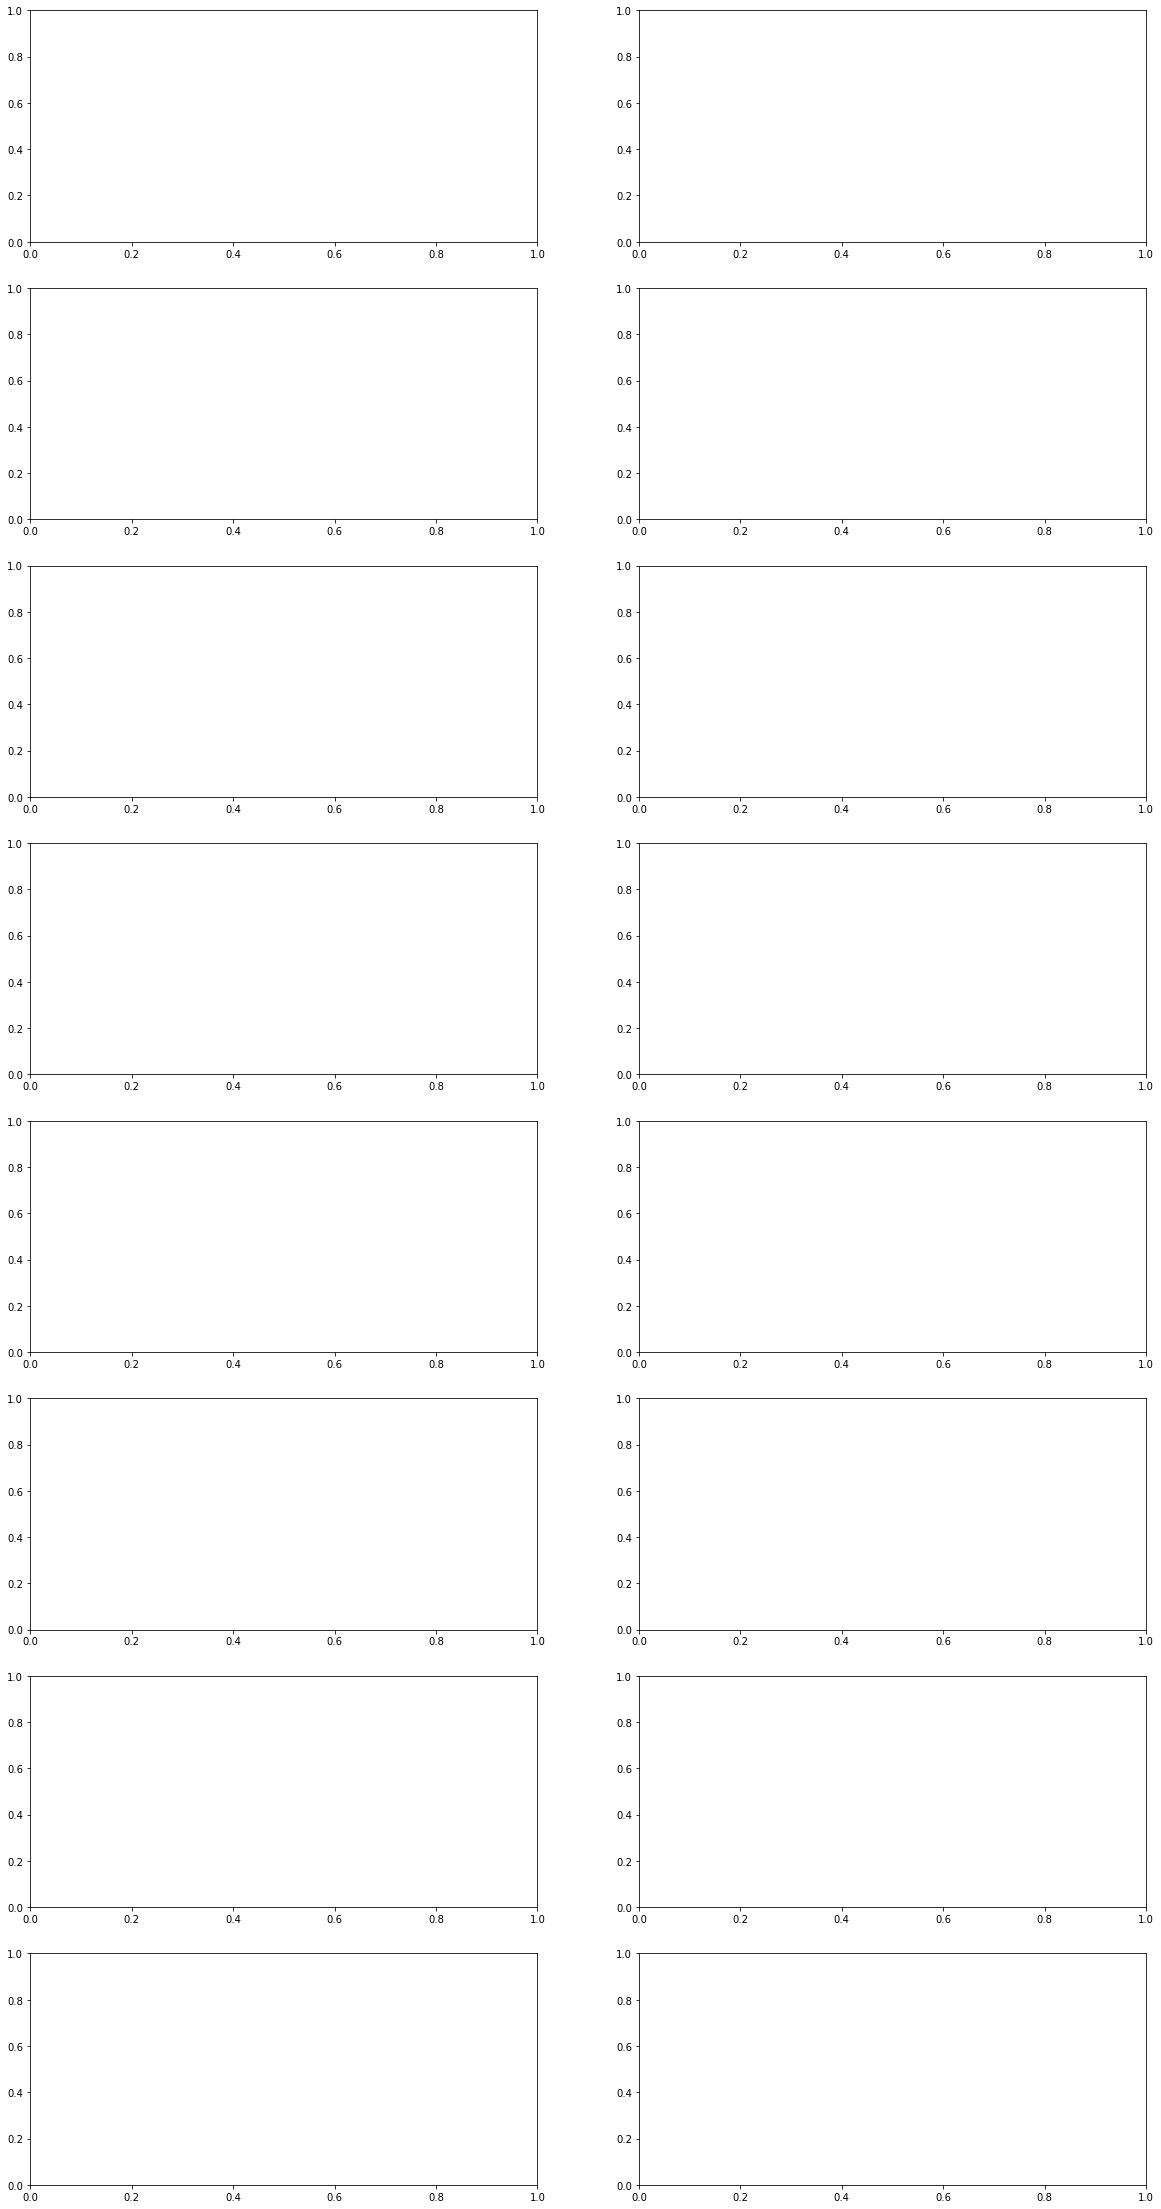

In [141]:
features_1 =['Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'Extent',
       'Eccentricity', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor4']
fig,ax=plt.subplots(8,2,figsize=(20,40))
for features, subplot in zip(Col_name,ax.flatten()):
    sns.violinplot(data=df_res,x='Class',y=features_1,inner='quartile',ax=subplot)
    subplot.set(xlabel=None)
plt.show()

In [140]:
df_res.columns

Index(['Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'Extent',
       'Eccentricity', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor4',
       'Class'],
      dtype='object')

In [137]:
df_res

,Perimeter,MajorAxisLength,MinorAxisLength,Extent,Eccentricity,Solidity,roundness,Compactness,ShapeFactor4,Class
0,610.291,208.178117,173.888747,0.763923,0.549812,0.988856,0.958027,0.913358,0.998724,SEKER
1,638.018,200.524796,182.734419,0.783968,0.411785,0.984986,0.887034,0.953861,0.998430,SEKER
2,624.110,212.826130,175.931143,0.778113,0.562727,0.989559,0.947849,0.908774,0.999066,SEKER
3,645.884,210.557999,182.516516,0.782681,0.498616,0.976696,0.903936,0.928329,0.994199,SEKER
4,620.134,201.847882,190.279279,0.773098,0.333680,0.990893,0.984877,0.970516,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...
24817,801.999,299.431987,186.820417,0.648913,0.747578,0.984005,0.855489,0.761486,0.992364,SIRA
24818,801.999,299.431987,186.820417,0.648913,0.747578,0.984005,0.855489,0.761486,0.992364,SIRA
24819,801.999,299.431987,186.820417,0.648913,0.747578,0.984005,0.855489,0.761486,0.992364,SIRA
24820,801.999,299.431987,186.820417,0.648913,0.747578,0.984005,0.855489,0.761486,0.992364,SIRA
